### In this notebook we'll pre-process our cleaned dataset to prepare it for modeling.

In [1]:
import pandas as pd
import pickle as pkl 
from module3_scripts.preprocessor import Preprocessor

Let's import the cleaned and compiled dataset (output from the additional data compilation notebook) along with the dataset's metadata containing info on the variable categorizations.

In [2]:
df = pd.read_csv('working_datasets/df_cleaned_compiled.csv')
df_metadata = pd.read_csv('working_datasets/df_cleaned_compiled_metadata.csv')

In [3]:
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,risk_free_rate,ten_yr_t_note_yield,stock_price,ytd_equity_return,last_div_amount,last_div_date,cpi_index
0,1,"CACI International, Inc.",CACI,Standard & Poor's Ratings Services,2016-04-19,Technology,1.692500,1.580058,0.088481,61.044407,...,8.478510,0.055727,58.183656,0.21,1.79,108.470001,0.210873,0.0,0,238.835
1,1,"CACI International, Inc.",CACI,Standard & Poor's Ratings Services,2014-11-26,Technology,1.741296,1.609233,0.152539,61.023170,...,10.835767,0.067716,61.119654,0.02,2.24,88.440002,0.211341,0.0,0,236.983
2,1,"CACI International, Inc.",CACI,Standard & Poor's Ratings Services,2013-10-25,Technology,0.980446,0.914422,0.086650,60.927607,...,10.835767,0.067716,25.633667,0.04,2.53,70.449997,0.239226,0.0,0,233.669
3,1,"CACI International, Inc.",CACI,Standard & Poor's Ratings Services,2016-09-29,Technology,1.631064,1.509086,0.086844,88.546086,...,9.473108,0.068467,32.298426,0.26,1.56,100.449997,0.121344,0.0,0,241.068
4,1,Nektar Therapeutics,NKTR,Egan-Jones Ratings Company,2015-04-01,Health Care,4.499820,3.769591,0.193061,6.559587,...,-1119.276757,-0.707529,10.556049,0.03,1.87,10.820000,-0.286750,0.0,0,235.976


Before we go further, let's use some discretion to drop some unimportant variables from the dataset. 

It would be good to remove the 'Name', 'Symbol', 'Date', and 'Rating Agency Name' variables, reasons below:

    1. Name - There should not be any reason a company's name affects it's bond rating.
    2. Symbol - Same as 1, no reason a company's ticker should affect it's bond rating. 
    3. Date - Same as 1 and 2, no reason the date should affect a bond rating. Also, this sort of datetime format will most likely cause issues during our model runs.
    4. Last Dividend Date - Exact same reason as #3.
    5. Rating Agency Name - Although each ratings agency may have different methodologies for arriving at a particular rating, we expect that naturally the ratings for any particular company's credit should be very similar, if not equivalent, across all agencies. Furthermore, since we've binned the different bond rating classes into just 3 generalized classes, we can safely assume that the ratings given by each and every ratings agency would be bucketed to the same generalized class, had they all been hired to do so.

In [4]:
cols_to_drop = ['Name', 'Symbol', 'Date', 'last_div_date', 'Rating Agency Name']
df.drop(cols_to_drop, axis=1, inplace=True)

In [5]:
df_metadata

,continuous_cols,categorical_cols,target_var
0,Name,Rating Agency Name,Rating
1,Symbol,Sector,NaN
2,Date,NaN,NaN
3,currentRatio,NaN,NaN
4,quickRatio,NaN,NaN
5,cashRatio,NaN,NaN
6,daysOfSalesOutstanding,NaN,NaN
7,netProfitMargin,NaN,NaN
8,pretaxProfitMargin,NaN,NaN
9,grossProfitMargin,NaN,NaN


For better compatibility with the functions/methods we'll use, let's convert the metadata into a dictionary below.

In [6]:
variables_categorization_dict = {
    col: [v for v in df_metadata[col] if str(v) != 'nan' and v not in cols_to_drop] 
    for col in df_metadata.columns 
}

In [7]:
variables_categorization_dict

{'continuous_cols': ['currentRatio',
  'quickRatio',
  'cashRatio',
  'daysOfSalesOutstanding',
  'netProfitMargin',
  'pretaxProfitMargin',
  'grossProfitMargin',
  'operatingProfitMargin',
  'returnOnAssets',
  'returnOnCapitalEmployed',
  'returnOnEquity',
  'assetTurnover',
  'fixedAssetTurnover',
  'debtEquityRatio',
  'debtRatio',
  'effectiveTaxRate',
  'freeCashFlowOperatingCashFlowRatio',
  'freeCashFlowPerShare',
  'cashPerShare',
  'companyEquityMultiplier',
  'ebitPerRevenue',
  'enterpriseValueMultiple',
  'operatingCashFlowPerShare',
  'operatingCashFlowSalesRatio',
  'payablesTurnover',
  'risk_free_rate',
  'ten_yr_t_note_yield',
  'stock_price',
  'ytd_equity_return',
  'last_div_amount',
  'cpi_index'],
 'categorical_cols': ['Sector'],
 'target_var': ['Rating']}

Now we can initialize the Preprocessor object and pass in the relevant arguments below.

In [8]:
#initialize preprocessor instance object
df_preprocessed = Preprocessor(
    df=df, 
    dep_var=variables_categorization_dict['target_var'][0],
    categorical_cols=variables_categorization_dict['categorical_cols'],
    continuous_cols=variables_categorization_dict['continuous_cols'],
    smote=True, #Enable SMOTE to address class imbalance issue we saw in data cleaning stage
    test_size=0.25
)

We'll now call the preprocess method on this object. You can refer to the module's docstrings for a deeper understanding of what's going on. The print statements below also give us a general overview.

In [9]:
df_preprocessed.preprocess()

=== Initiating pre-processing of dataset ===
Applying one-hot encoding on all categorical variables...
Applying train-test split on dataset...
	 Test set size: 0.25
	 Random state: 123
Applying SMOTE resampling on training set...
Transforming predictor training and test sets using StandardScaler...
	Columns exempted from transformation: []
=== Completed pre-processing! ===


Pre-processing is complete, let's take a preview look at the relevant attributes of our object. These attributes are the train and test sets for our predictor and target variables.

In [10]:
df_preprocessed.X_train.head()

,Sector_Basic Industries,Sector_Capital Goods,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,...,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,risk_free_rate,ten_yr_t_note_yield,stock_price,ytd_equity_return,last_div_amount,cpi_index
0,0,0,0,0,0,1,0,0,0,0,...,0.265916,-0.078567,3.423237,-0.894126,-0.768132,1.662073,0.818040,0.051354,5.790363,-0.451170
1,0,1,0,0,0,0,0,0,0,0,...,-0.048266,-0.059971,-0.340265,0.193819,-0.428234,1.987688,0.338323,0.016709,0.039255,-2.566685
2,0,0,0,0,1,0,0,0,0,0,...,-0.059116,-0.076688,-0.423996,-0.487687,-0.598183,0.185954,-0.478371,-0.114097,-0.145723,0.204451
3,0,0,0,0,0,1,0,0,0,0,...,0.040454,-0.081202,-0.743947,-0.452974,1.101304,-0.421859,-0.364137,-0.001041,1.866605,0.829808
4,0,0,0,0,0,0,0,0,0,1,...,-0.060840,-0.062949,0.004087,0.278915,-0.683157,0.077416,-0.303172,-0.031292,-0.119938,0.635640


In [11]:
df_preprocessed.X_test.head()

,Sector_Basic Industries,Sector_Capital Goods,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,...,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,risk_free_rate,ten_yr_t_note_yield,stock_price,ytd_equity_return,last_div_amount,cpi_index
0,0,0,1,0,0,0,0,0,0,0,...,-0.053331,-0.077965,-0.795979,0.193308,-0.173311,-1.159919,-0.390404,-0.014873,-0.039221,-1.666538
1,1,0,0,0,0,0,0,0,0,0,...,-0.019784,-0.078556,-0.788412,0.158599,-0.853106,0.012293,-0.218260,0.025310,-0.263435,0.385787
2,1,0,0,0,0,0,0,0,0,0,...,-0.028880,-0.061300,-0.285120,-0.892265,-0.683157,0.772061,-0.197066,0.009412,0.011418,0.496914
3,0,0,0,0,0,0,0,0,0,0,...,-0.039962,-0.067565,-0.508633,0.003441,-0.768132,0.012293,-0.216259,-0.026408,0.297101,0.385787
4,0,0,0,0,1,0,0,0,0,0,...,-0.026398,-0.080903,-0.482752,-0.294147,1.866074,-1.203334,-0.393280,-0.022519,-0.252225,1.255913


In [12]:
df_preprocessed.y_train.head()

0    1
1    3
2    1
3    2
4    2
Name: Rating, dtype: int64

In [13]:
df_preprocessed.y_test.head()

1065    2
1060    2
868     2
319     1
511     1
Name: Rating, dtype: int64

Lastly, let's call the module's .display_transformed_distributions() method to take a look at the distributions of the transformed variables in the predictor training set. We'll use this to make a visual observation if the scaling was done correctly.

=== Displaying distributions of transformed variables in predictor training set ===


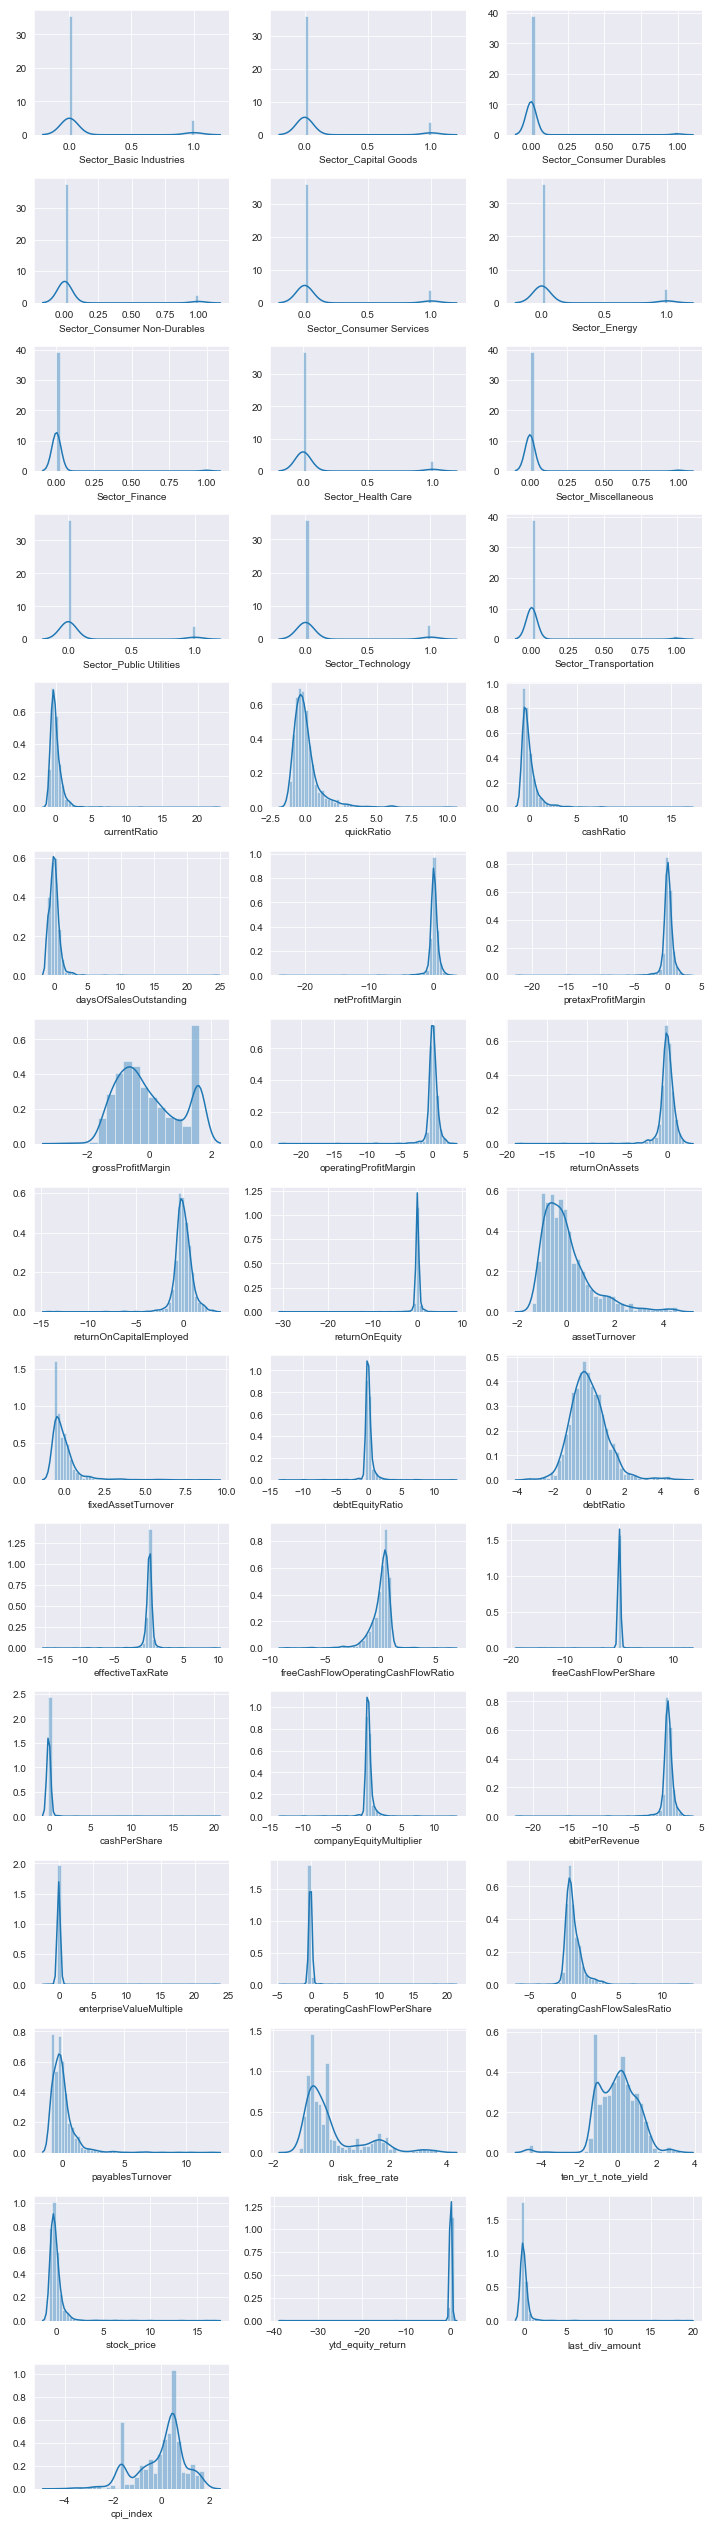

In [14]:
df_preprocessed.display_transformed_distributions()

Looking at the axes of the plots, look's like our standardization was a success. The 'U'-shaped distributions are our dummy variables.

We'll save the df_preprocessed object as a pickle file, and we'll use this object for our actual modeling.

In [15]:
pkl.dump(df_preprocessed, open("pkl/df_preprocessed.p","wb"))